In [82]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry

from pyFTS.partitioners import Grid, Entropy, Util as pUtil
from pyFTS.models.seasonal import partitioner as seasonal
from pyFTS.models.seasonal.common import DateTime
from pyFTS.models import chen
from pyFTS.common import Membership
from pyFTS.models.multivariate import flrg, common as mcommon, variable, granular, partitioner, mvfts
from sklearn.decomposition import PCA
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("water-and-sanitation.csv")
data.head()

,Access to improved drinking water,Access to basic drinking water,Access to limited drinking water,Access to unimproved drinking water,No access to drinking water,Access to safely managed drinking water,Access to improved sanitation,Access to basic sanitation services,Access to limited sanitation services,Access to unimproved sanitation facilities,...,wat_bas_without,wat_sm_without,san_imp_number_without,san_bas_number_without,san_sm_number_without,san_imp_without,san_bas_without,san_sm_without,hyg_bas_number_without,hyg_bas_without
0,31.83,28.17,3.66,43.18,24.99,10.93,27.52,21.87,5.65,46.68,...,71.83,89.07,15061452.0,16235214.0,NaN,72.48,78.13,NaN,NaN,NaN
1,31.86,28.20,3.66,43.17,24.97,10.94,27.54,21.88,5.66,46.68,...,71.80,89.06,15656386.0,16879101.0,NaN,72.46,78.12,NaN,NaN,NaN
2,34.19,30.24,3.95,41.69,24.12,11.73,29.27,23.27,6.00,45.74,...,69.76,88.27,15984867.0,17340626.0,NaN,70.73,76.73,NaN,NaN,NaN
3,36.51,32.27,4.24,40.21,23.28,12.51,31.01,24.67,6.34,44.81,...,67.73,87.49,16338160.0,17839408.0,NaN,68.99,75.33,NaN,NaN,NaN
4,38.85,34.33,4.52,38.72,22.42,13.31,32.76,26.07,6.69,43.87,...,65.67,86.69,16627222.0,18281012.0,NaN,67.24,73.93,NaN,NaN,NaN


In [3]:
data.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 118 columns):
 #    Column                                                               Non-Null Count  Dtype  
---   ------                                                               --------------  -----  
 0    Access to improved drinking water                                    5069 non-null   float64
 1    Access to basic drinking water                                       5069 non-null   float64
 2    Access to limited drinking water                                     5069 non-null   float64
 3    Access to unimproved drinking water                                  5069 non-null   float64
 4    No access to drinking water                                          4977 non-null   float64
 5    Access to safely managed drinking water                              3162 non-null   float64
 6    Access to improved sanitation                                        5043 non-null   float64
 

In [65]:
selected_data = data.copy()
selected_data = selected_data[[
    'Entity', 'Year', 
    'Access to improved sanitation', 
    'Access to basic sanitation services', 
    'Access to limited sanitation services',
    'Access to unimproved sanitation facilities', 
    'Open defecation (no sanitation facilities)', 
    'Access to safely managed sanitation']]

In [66]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      5118 non-null   object 
 1   Year                                        5118 non-null   int64  
 2   Access to improved sanitation               5043 non-null   float64
 3   Access to basic sanitation services         5043 non-null   float64
 4   Access to limited sanitation services       5043 non-null   float64
 5   Access to unimproved sanitation facilities  5043 non-null   float64
 6   Open defecation (no sanitation facilities)  4978 non-null   float64
 7   Access to safely managed sanitation         2923 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 320.0+ KB


In [67]:
selected_data = selected_data.fillna(0)
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      5118 non-null   object 
 1   Year                                        5118 non-null   int64  
 2   Access to improved sanitation               5118 non-null   float64
 3   Access to basic sanitation services         5118 non-null   float64
 4   Access to limited sanitation services       5118 non-null   float64
 5   Access to unimproved sanitation facilities  5118 non-null   float64
 6   Open defecation (no sanitation facilities)  5118 non-null   float64
 7   Access to safely managed sanitation         5118 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 320.0+ KB


In [7]:
# create plot for every category for every country
# for i in range(2, len(selected_data.columns)):
#     fig = px.line(selected_data, x='Year', y=selected_data.columns[i], color='Entity')
#     fig.show()

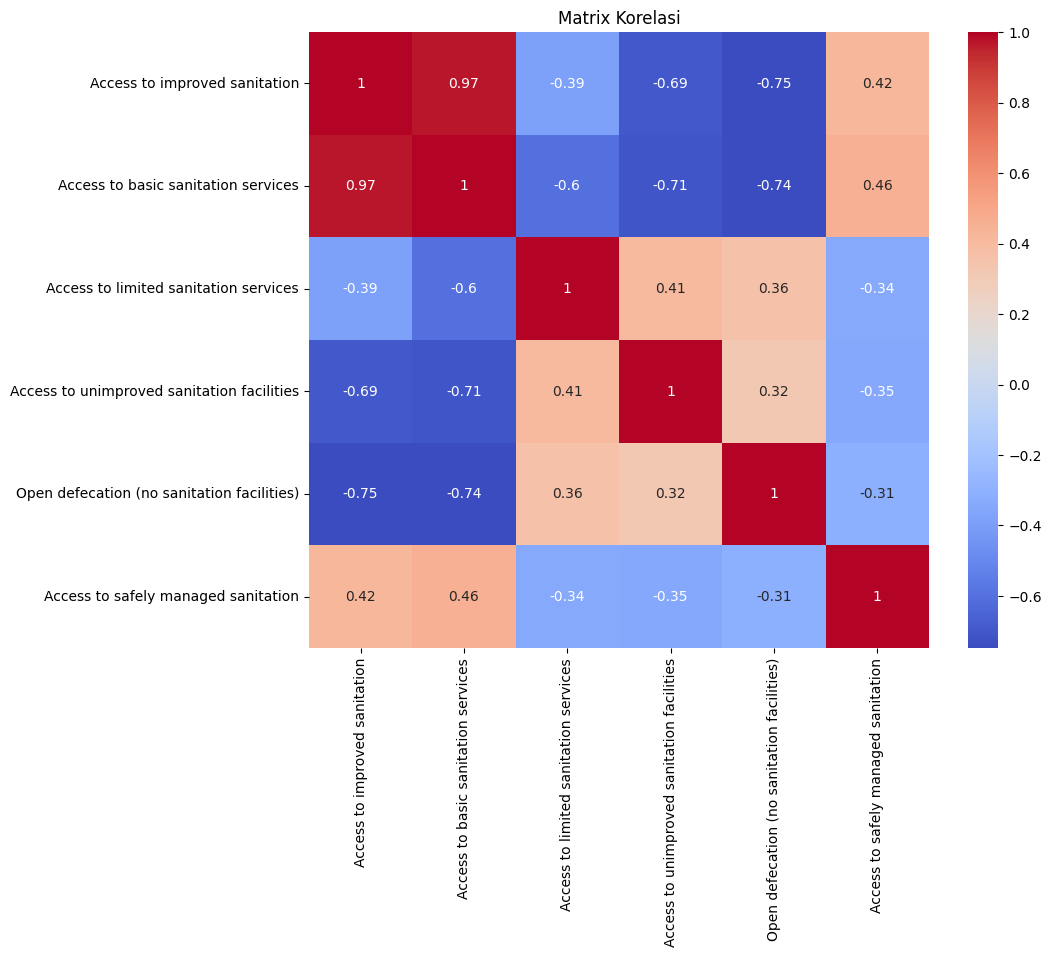

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.iloc[:,2:].corr(), annot=True, cmap="coolwarm")
plt.title("Matrix Korelasi")
plt.show()

In [9]:
# def get_country_code(country_name):
#   try:
#     return pycountry.countries.get(name=country_name).alpha_3
#   except:
#     return None

In [10]:
# selected_data['country_code'] = selected_data['Entity'].apply(lambda x: get_country_code(x))
# selected_data.head()

,Entity,Year,Access to improved sanitation,Access to basic sanitation services,Access to limited sanitation services,Access to unimproved sanitation facilities,Open defecation (no sanitation facilities),Access to safely managed sanitation,country_code
0,Afghanistan,2000,27.52,21.87,5.65,46.68,25.80,0.0,AFG
1,Afghanistan,2001,27.54,21.88,5.66,46.68,25.78,0.0,AFG
2,Afghanistan,2002,29.27,23.27,6.00,45.74,24.98,0.0,AFG
3,Afghanistan,2003,31.01,24.67,6.34,44.81,24.19,0.0,AFG
4,Afghanistan,2004,32.76,26.07,6.69,43.87,23.38,0.0,AFG


## FTS

In [62]:
# selected_data['Year'] = pd.to_datetime(selected_data['Year'], format='%Y')

In [72]:
country = 'Indonesia'
country_data = selected_data[selected_data['Entity'] == country]
country_data

,Entity,Year,Access to improved sanitation,Access to basic sanitation services,Access to limited sanitation services,Access to unimproved sanitation facilities,Open defecation (no sanitation facilities),Access to safely managed sanitation
2053,Indonesia,2000,52.69,38.04,14.65,14.73,32.58,0.0
2054,Indonesia,2001,54.94,40.23,14.71,13.97,31.09,0.0
2055,Indonesia,2002,57.17,42.45,14.72,13.23,29.61,0.0
2056,Indonesia,2003,59.37,44.70,14.67,12.49,28.15,0.0
2057,Indonesia,2004,61.54,46.98,14.56,11.76,26.70,0.0
2058,Indonesia,2005,63.69,49.29,14.40,11.04,25.27,0.0
2059,Indonesia,2006,65.81,51.63,14.18,10.33,23.86,0.0
2060,Indonesia,2007,67.91,54.00,13.91,9.62,22.47,0.0
2061,Indonesia,2008,69.98,56.39,13.59,8.93,21.09,0.0
2062,Indonesia,2009,72.02,58.80,13.22,8.25,19.74,0.0


In [73]:
# create plot for country_data for every category
for i in range(2, len(country_data.columns)):
    fig = px.line(country_data, x='Year', y=country_data.columns[i], color='Entity')
    fig.show()

/home/dzal/.local/lib/python3.10/site-packages/pyFTS/partitioners/partitioner.py:238: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'Access to Improved Sanitation')

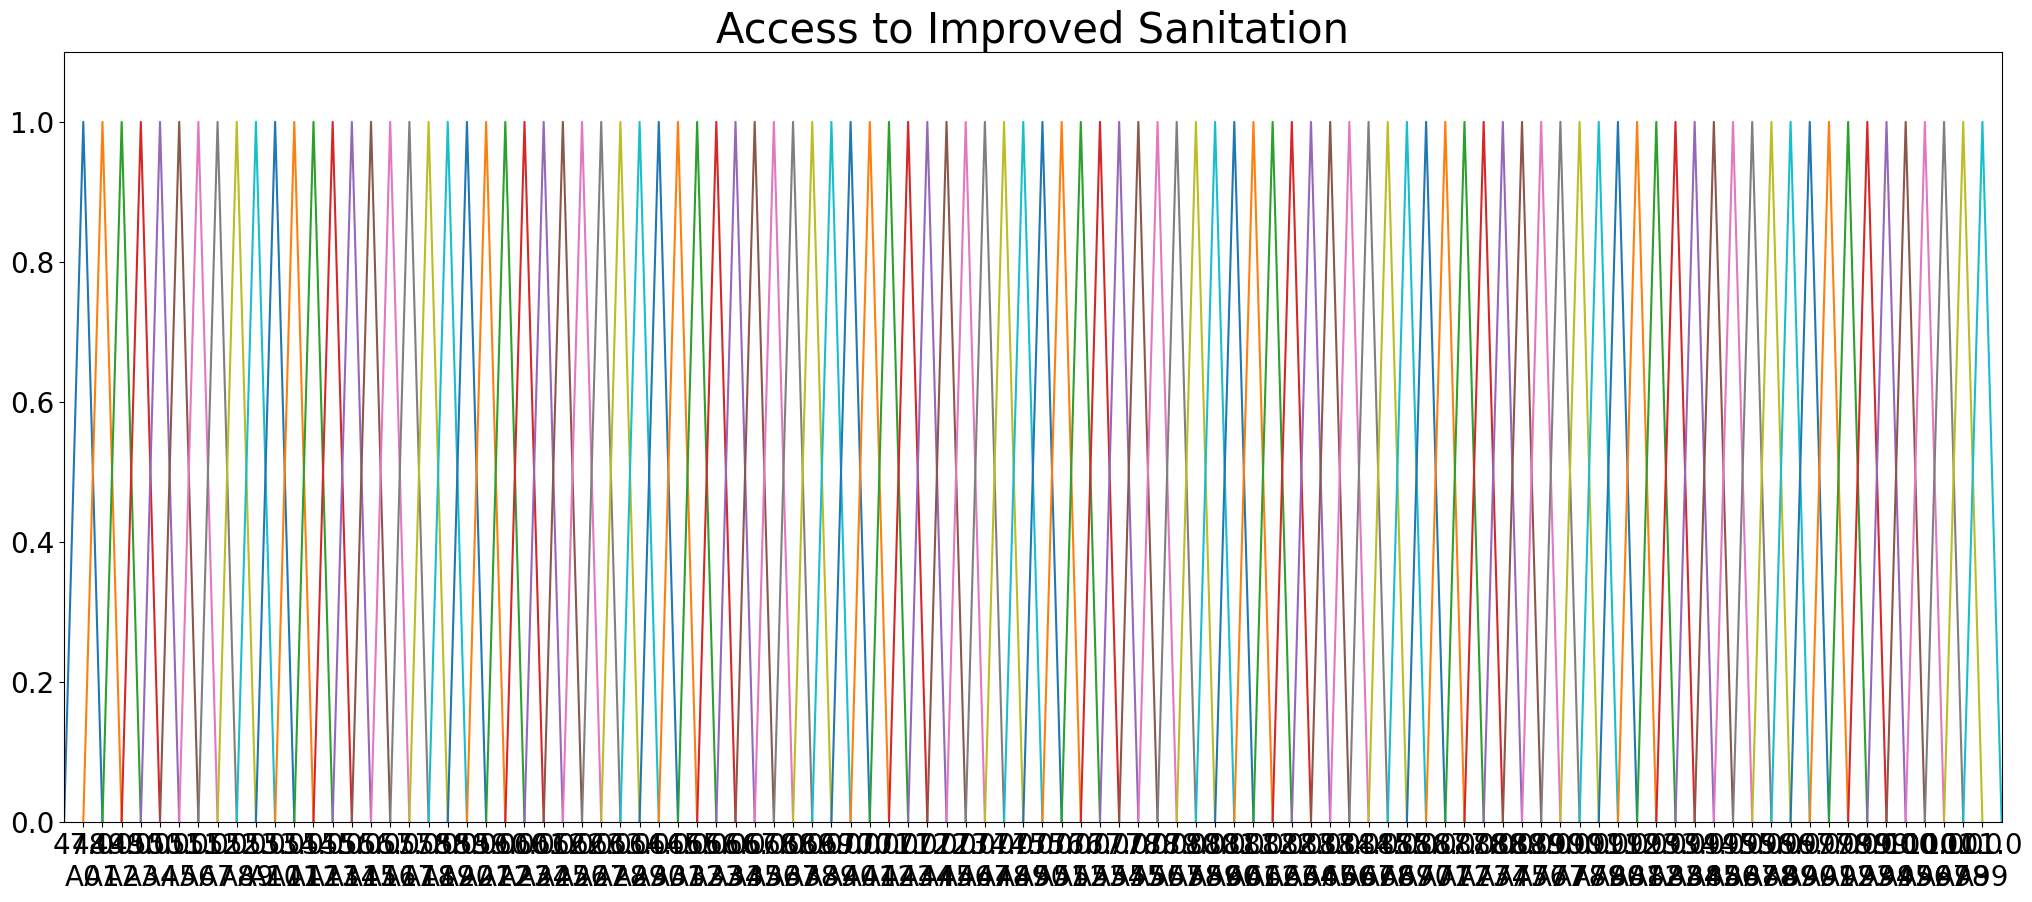

In [87]:
# make fuzzy set
fs = Grid.GridPartitioner(
    data=country_data['Access to improved sanitation'].values, npart=100)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[25, 10])

ax.set_ylim(-0.1, 0.1)
ax.set_xlim(0, len(country_data['Access to improved sanitation'].values))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

fs.plot(ax)
ax.set_title("Access to Improved Sanitation", fontsize=30)

In [88]:
print(fs)

Grid:
A0: trimf([46.877269999999996, 47.421, 47.96473])
A1: trimf([47.421, 47.96473, 48.50846000000001])
A2: trimf([47.96473, 48.50846000000001, 49.05219000000001])
A3: trimf([48.50846000000001, 49.05219000000001, 49.595920000000014])
A4: trimf([49.05219000000001, 49.595920000000014, 50.13965000000002])
A5: trimf([49.595920000000014, 50.13965000000002, 50.68338000000002])
A6: trimf([50.13965000000002, 50.68338000000002, 51.227110000000025])
A7: trimf([50.68338000000002, 51.227110000000025, 51.77084000000003])
A8: trimf([51.227110000000025, 51.77084000000003, 52.31457000000003])
A9: trimf([51.77084000000003, 52.31457000000003, 52.858300000000035])
A10: trimf([52.31457000000003, 52.858300000000035, 53.40203000000004])
A11: trimf([52.858300000000035, 53.40203000000004, 53.94576000000004])
A12: trimf([53.40203000000004, 53.94576000000004, 54.489490000000046])
A13: trimf([53.94576000000004, 54.489490000000046, 55.03322000000005])
A14: trimf([54.489490000000046, 55.03322000000005, 55.5769500

In [89]:
model = chen.ConventionalFTS(partitioner=fs)
model.fit(country_data['Access to improved sanitation'].values)
print(model)

Conventional FTS:
A10 -> A14
A14 -> A18
A18 -> A22
A22 -> A26
A26 -> A30
A30 -> A34
A34 -> A38
A38 -> A41
A41 -> A45
A45 -> A49
A49 -> A53
A53 -> A56
A56 -> A60
A60 -> A63
A63 -> A67
A67 -> A70
A70 -> A73
A73 -> A77
A77 -> A80
A80 -> A83



In [90]:
prediction = model.predict(country_data['Access to improved sanitation'].values)

In [91]:
fts_dates = country_data['Year'].values
df = pd.DataFrame({
    'date': fts_dates,
    'actual': country_data['Access to improved sanitation'].values,
    'forecast': prediction
})

In [92]:
# Plot the data using Plotly
fig = go.Figure()

# Add actual data
fig.add_trace(go.Scatter(
    x=df['date'], y=df['actual'], mode='lines', name='Actual'))

# Add forecast data
fig.add_trace(go.Scatter(
    x=df['date'], y=df['forecast'], mode='lines', name='Forecast'))

# Set layout
fig.update_layout(
    xaxis=dict(
        tickangle=45,
        tickfont=dict(size=12),
        tickformat='%Y-%m-%d'
    ),
    yaxis=dict(
        title='CO',
        title_font=dict(size=20),
        tickfont=dict(size=20)
    ),
    legend=dict(
        x=1,
        y=0,
        xanchor='right',
        yanchor='bottom',
        font=dict(size=12)
    )
)

# Add vertical lines with alternating styles
for i in range(len(fts_dates)):
    if i % 2 == 0:
        fig.add_shape(type='line', x0=fts_dates[i], y0=0, x1=fts_dates[i], y1=1, line=dict(
            color='black', width=1, dash='solid'))
    else:
        fig.add_shape(type='line', x0=fts_dates[i], y0=0, x1=fts_dates[i], y1=1, line=dict(
            color='black', width=1, dash='dash'))

fig.show()

In [94]:
# show model performance
from pyFTS.benchmarks import Measures

print("RMSE : ", Measures.rmse(df['actual'], df['forecast']))
print("MAPE : ", Measures.mape(df['actual'], df['forecast']))

RMSE :  2.0075423721486203
MAPE :  2.793979483336042
